<a href="https://colab.research.google.com/github/shanthan5327/ML_Models/blob/main/image_classification_happy%20or%20sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip ImageClassification-main.zip

Archive:  ImageClassification-main.zip
ecbc2b219606c4153bdec47cd07f6ab00652c6d6
   creating: ImageClassification-main/
 extracting: ImageClassification-main/.gitignore  
 extracting: ImageClassification-main/154006829.jpg  
  inflating: ImageClassification-main/8iAb9k4aT.jpg  
  inflating: ImageClassification-main/Getting Started.ipynb  
   creating: ImageClassification-main/data/
   creating: ImageClassification-main/data/happy/
  inflating: ImageClassification-main/data/happy/05-12-21-happy-people.jpg  
  inflating: ImageClassification-main/data/happy/07-120104-happy_people_are_not_nice_people.jpg  
  inflating: ImageClassification-main/data/happy/1-2.jpg  
  inflating: ImageClassification-main/data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg  
  inflating: ImageClassification-main/data/happy/11-Habits-of-Truly-Happy-People.jpg  
 extracting: ImageClassification-main/data/happy/154006829.jpg  
  inflating: ImageClassification-main/data/happy/170404-happy-workers-featur

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/ImageClassification-main/data'

In [ ]:
os.listdir(data_dir)

['sad', 'happy']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('img not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/ImageClassification-main/data')

Found 305 files belonging to 2 classes.


In [ ]:
#get another batch from iterator
data_iterator = data.as_numpy_iterator()

In [ ]:
#image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch = data_iterator.next()

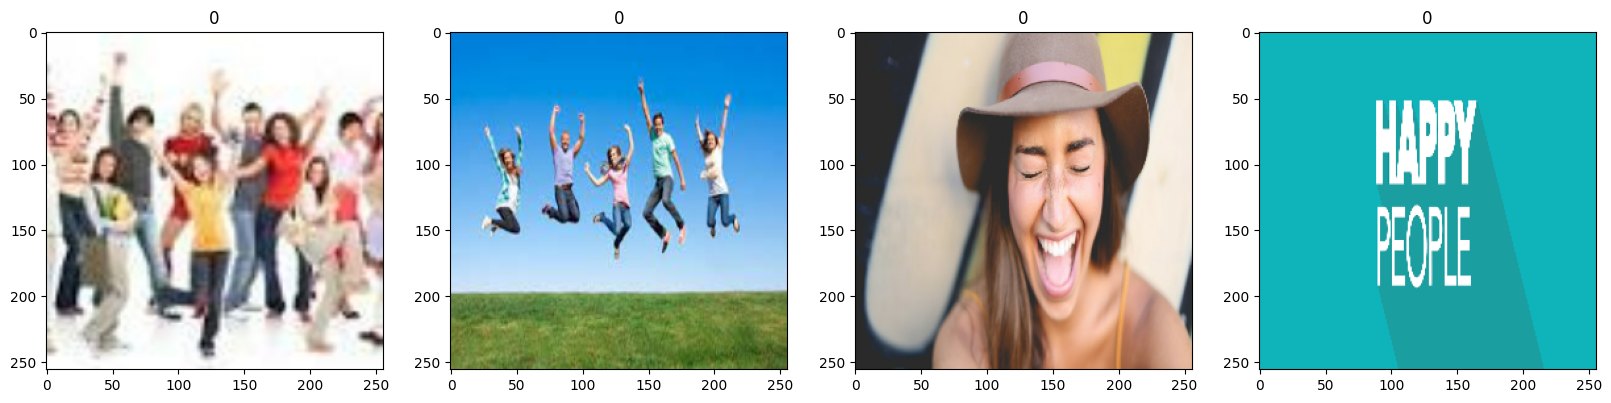

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#class 1 - sad
#class 0 - happy

# preprocess data

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()

(array([[[[0.7607843 , 0.76862746, 0.58431375],
          [0.761106  , 0.76894915, 0.58463544],
          [0.7647059 , 0.77254903, 0.5882353 ],
          ...,
          [0.647595  , 0.66328126, 0.52602637],
          [0.64345896, 0.65914524, 0.52189034],
          [0.63932294, 0.6550092 , 0.5177543 ]],
 
         [[0.75851214, 0.7663553 , 0.58204156],
          [0.7609144 , 0.7687575 , 0.5844438 ],
          [0.76268923, 0.77053237, 0.5862186 ],
          ...,
          [0.647595  , 0.66328126, 0.52602637],
          [0.64345896, 0.65914524, 0.52189034],
          [0.63932294, 0.6550092 , 0.5177543 ]],
 
         [[0.756935  , 0.7647782 , 0.5804644 ],
          [0.7596102 , 0.7674533 , 0.5831396 ],
          [0.7613205 , 0.7691636 , 0.5848499 ],
          ...,
          [0.647595  , 0.66328126, 0.52602637],
          [0.6446331 , 0.6603194 , 0.5230645 ],
          [0.640602  , 0.6562883 , 0.5190334 ]],
 
         ...,
 
         [[0.6745098 , 0.69411767, 0.5372549 ],
          [0.67450

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
#split data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [ ]:
test_size

1

In [ ]:
train = data.skip(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
#build the deep learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
3/3 [==============================] - 10s 2s/step - loss: 1.5905 - accuracy: 0.4074 - val_loss: 0.8525 - val_accuracy: 0.5469
Epoch 2/20
3/3 [==============================] - 8s 3s/step - loss: 0.8476 - accuracy: 0.4938 - val_loss: 0.7356 - val_accuracy: 0.4844
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.7534 - accuracy: 0.4321 - val_loss: 0.6831 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 8s 2s/step - loss: 0.6742 - accuracy: 0.6296 - val_loss: 0.6667 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 8s 2s/step - loss: 0.6765 - accuracy: 0.5185 - val_loss: 0.6811 - val_accuracy: 0.5156
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.6818 - accuracy: 0.4938 - val_loss: 0.6550 - val_accuracy: 0.7656
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 0.6587 - accuracy: 0.7531 - val_loss: 0.6425 - val_accuracy: 0.7188
Epoch 8/20
3/3 [========================

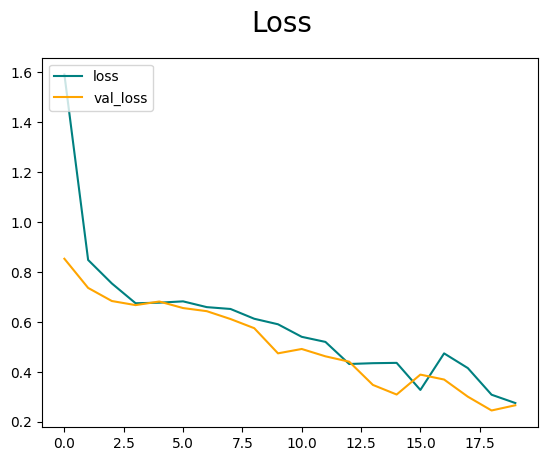

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

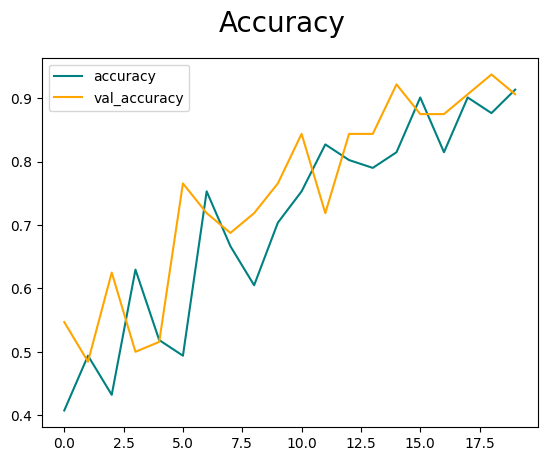

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 254ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


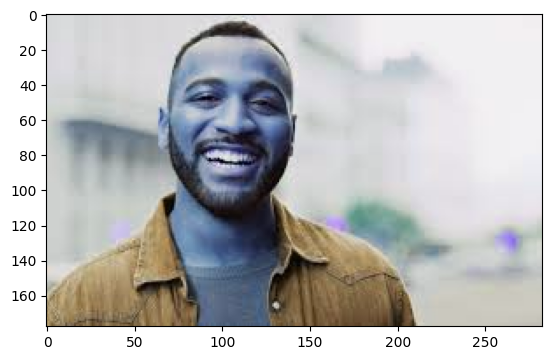

In [ ]:
img = cv2.imread('/content/happytest.jpg')
plt.imshow(img)
plt.show()

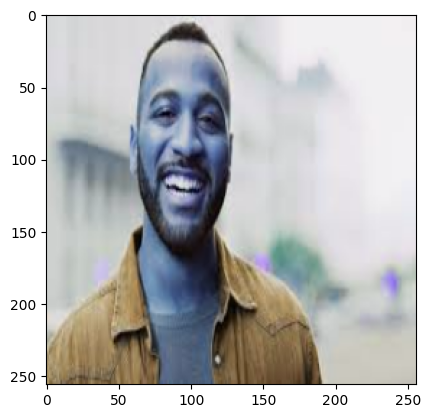

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
yhat

array([[0.7562739]], dtype=float32)

In [ ]:
#save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))